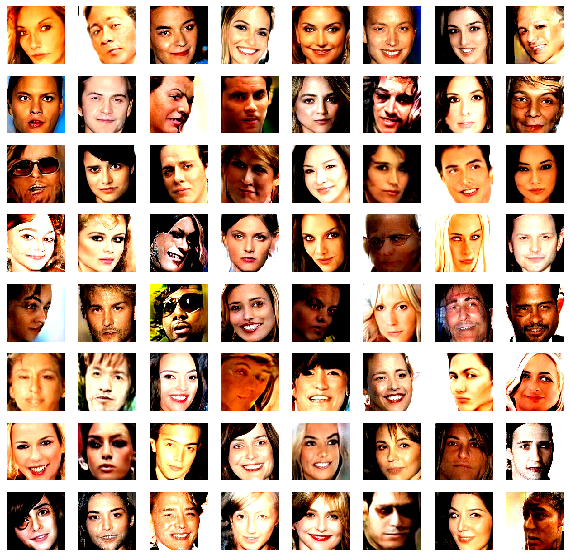

In [4]:

import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt
import numpy as np


# モデルのダウンロード
gan = hub.Module("https://tfhub.dev/google/progan-128/1")


# 64個の 512次元乱数をモデルに入力
z_values = np.random.randn(64, 512)
images = gan(z_values)


with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    # 画像生成
    out = sess.run(images)

    # 8行 8列で表示
    r, c = 8, 8
    fig, axs = plt.subplots(r, c, figsize=(10,10)) 
    cnt = 0       
    for i in range(r):
        for j in range(c):
            axs[i,j].imshow(out[cnt])
            axs[i,j].axis('off')  
            cnt += 1
                
    fig.savefig("images.png")
    plt.show()
    plt.close()


In [3]:

import tensorflow as tf
import tensorflow_hub as hub
from PIL import Image
import numpy as np


# モデルのダウンロード
gan = hub.Module("https://tfhub.dev/google/progan-128/1")


# seed=16 で 64個の 512次元乱数を生成
np.random.seed(seed=16)
z = np.random.randn(64, 512)

# ベクトルの加減算
x = z[30] - z[20] + z[50]
z_values = np.reshape(x,(1,512))
images = gan(z_values)


with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    # 画像生成
    out = sess.run(images)


    # 画像保存
    for i, image in enumerate(out):
        Image.fromarray(np.uint8(image * 255)).save(f"result_{i}.png")  
